In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
start = time.perf_counter()

# Parametry fizyczne
hbar = 1.0
m = 1.0

# Siatka przestrzenna
N = 2**13
x_max = 50.0
x = np.linspace(-x_max, x_max, N)
dx = x[1] - x[0]

# Operator Laplace’a (druga pochodna)
diag = -2.0 * np.ones(N)
off_diag = 1.0 * np.ones(N - 1)
T = (np.diag(diag) + np.diag(off_diag, +1) + np.diag(off_diag, -1)) / dx**2

# Potencjał oscylatora harmonicznego# Potencjał: V(x, y)
epsilon = 0.6

# Inicjalizacja potencjału jako tablica zer
V = np.zeros_like(x)

# Obliczam V tylko tam, gdzie x mieści się w zadanym przedziale
V = -2 / np.sqrt(x**2 + epsilon)
V_matrix = np.diag(V)

# Hamiltonian
H = -(hbar**2 / (2 * m)) * T + V_matrix

# Rozwiązanie zagadnienia własnego
energies, wavefuncs = np.linalg.eigh(H)

energies = energies[energies < 0]

end = time.perf_counter()
print(f"Czas działania: {end - start:.6f} sekundy")

Czas działania: 75.523121 sekundy


Najniższe energie własne:
E_4 = -0.230322
E_5 = -0.168257
E_6 = -0.128896
E_7 = -0.101348
E_8 = -0.082106
E_9 = -0.067591
E_10 = -0.056750
E_11 = -0.047766
E_12 = -0.039555
E_13 = -0.030454
E_14 = -0.020225
E_15 = -0.008361


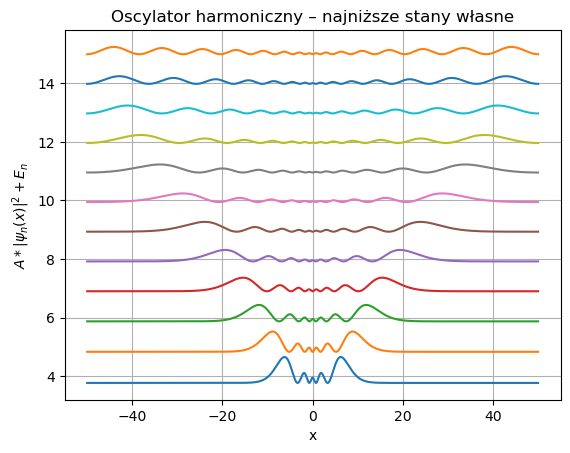

In [2]:
# Wypisz kilka najniższych energii
print("Najniższe energie własne:")
for i in range(4, len(energies)):
    print(f"E_{i} = {energies[i]:.6f}")

# Normalizuj i narysuj funkcje falowe
for i in range(4, len(energies)):
    psi = wavefuncs[:, i]
    psi /= np.linalg.norm(psi)  # normalizacja
    plt.plot(x, 700*np.abs(psi)**2 + energies[i] + i)       # ψ_n przesunięta w pionie
plt.title("Oscylator harmoniczny – najniższe stany własne")
plt.xlabel("x")
plt.ylabel("$A*|ψ_n(x)|^2 + E_n$")
plt.grid()
plt.show()


In [11]:
np.save("funkcje psi(E) dla Coulomba 1D FD.npy", wavefuncs[:, ])

In [12]:
np.save("energie własne E dla Coulomba 1D FD.npy", energies)

ValueError: x and y must be the same size

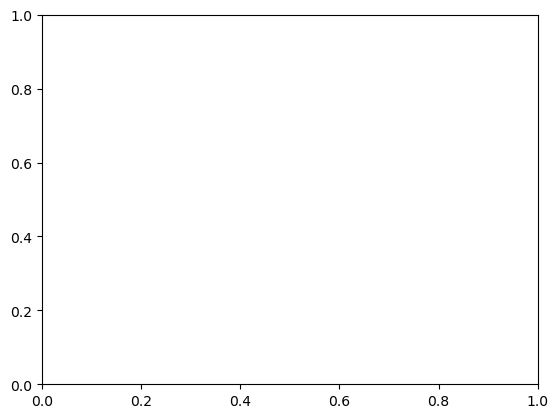

In [69]:
n = np.linspace(0, 5, 6)
a = 2.18
f = a / (2 * (n + 1.0)**2.0)

plt.scatter(n, np.abs(energies))
plt.scatter(n, f)
plt.yscale('log')
plt.show()